This is NOT my own work. This notebook is simply a follow-along to an online Machine Learning example.\
Found at: https://tirendazacademy.medium.com/machine-learning-project-with-linear-regression-algorithm-b433d770fefd\
\
It uses a Medical Cost Personal Dataset from Kaggle.\
https://www.kaggle.com/datasets/mirichoi0218/insurance

Step 1:
Importing pandas and loading the dataset.

In [ ]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Aoife\OneDrive\Desktop\CodeFiles\insurance.csv")

data.head()
#giving 7 columns

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Step 2:
Understanding the dataset.

In [ ]:
#number of rows and columns
data.shape

(1338, 7)

In [15]:
#checking for missing data - reveals no null values
data.info()

#can also be checked with;
data.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
#sum of the missing data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We found no missing data in the dataset.\
Next we need to know the column types.

In [17]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Step 3:
Data preprocessing; \
\
Converting object types to category types. An object column usually contains strings, but a category column is a special type in pandas for variables that take on a limited, fixed number of values. \
-- Pandas can store these internally as numbers 
        -- 0 for Male, 1 for Female

In [19]:
#converting;
data['sex'] = data['sex'].astype('category')
data['region'] = data['region'].astype('category')
data['smoker'] = data['smoker'].astype('category')

#checking it worked;
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

Looking at the statistics of the numeric (int, float) variables.

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Single out the smoker variable and look at the mean charges for smoker and non-smokers.\
We need to group these categories.

In [27]:
smoke_data = data.groupby("smoker").mean(numeric_only=True).round(2)
smoke_data


C:\Users\Aoife\AppData\Local\Temp\ipykernel_25196\3655819931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoke_data = data.groupby("smoker").mean(numeric_only=True).round(2)


,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


This indicates that smokers, on average, pay more than non-smokers.

Step 4: Data visualisation\
\
We use seaborn to look at the relationships of numeric variables. Seaborn is a Python data visualization library built on top of matplotlib.

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")  #plot style

Matplotlib is building the font cache; this may take a moment.


We can use the pairplot method to see the relationships of numeric variables.

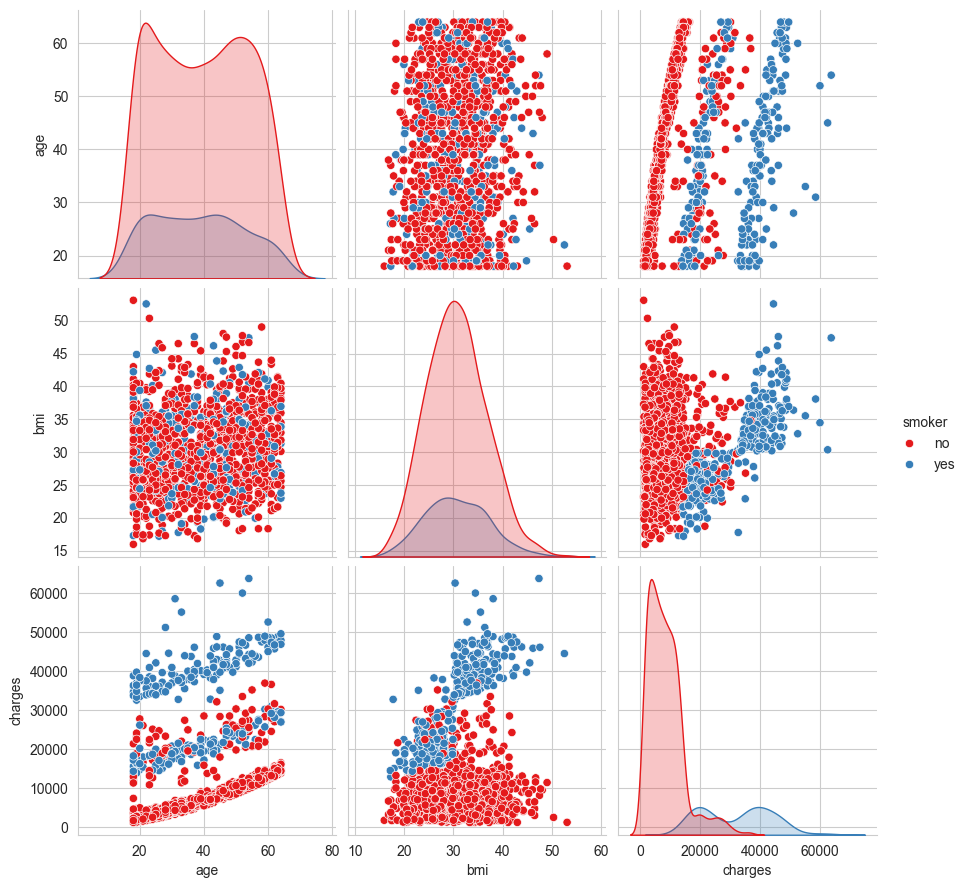

In [36]:
sns.pairplot(
    data[["age", "bmi", "charges", "smoker"]],  #selects columns
    hue = "smoker",     #colour points based on the smoker column
    height = 3,         #set size of the subplots
    palette = "Set1")   # colour scheme

When the age variable increases, both smokers and non-smokers pay more. \
Next we should look at the correlation between variables.

<Axes: >

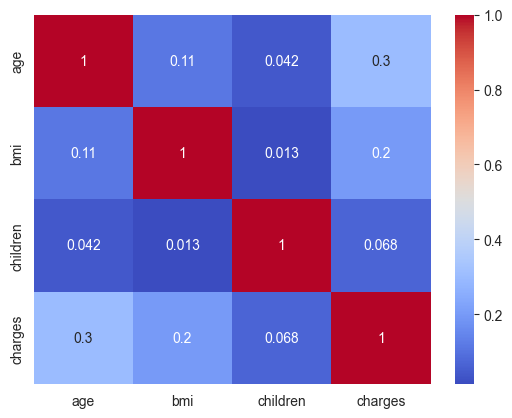

In [47]:
numeric_data = data.select_dtypes(include='number')  # selects only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap = 'coolwarm')


We can see a relationship between charges and other variables; age, bmi, and children.

We then use One-Hot Encoding, a technique used to convert categorical variables into numeric form so they can be used in ML models.\
\
Pandas supplies a simple method using get_dummies, where only categorical variables are converted. New columns are created for each subcategory.

In [49]:
data = pd.get_dummies(data)
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

Step 5: Building a regression model.
We will start with the simplest model before trying a more complex approach if the accuracy is low.\
\
Determine the input and output variables. 
    Input variables are features -- independent variables.
    Output variable is the target -- dependent variable.

The output variable is numeric so we can build a linear regression model.

In [ ]:
#We assign the target variable charges to y
y = data["charges"]

#Then drop the target variable, leaving the remainders/features.
X = data.drop("charges", axis =1)  #0 - drop rows, 1 - drop columns

Next is to split the dataset into training and test data. The model is built on the training data and evaluated on the test data.\
\
We'll use scikit-learn to split the dataset using the train_test_split method -- choosing an 80-20 split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 1)

We also need to import the linear regression class from scikit-learn

In [58]:
from sklearn.linear_model import LinearRegression

#create an instance of the LinReg class
lr = LinearRegression()

#Build the model using the training data
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Step 6: Model evaluation:\
\
We look at the performace of the model, using the coefficients of determination. 
Values closer to 1 => better model

In [67]:
score1 = lr.score(X_test, y_test)
rounded_score1 = round(score1, 3)
rounded_score1

0.762

The coefficient of determination on the test data is greater than 0.7, which is not bad.\
\
Then we score the model on the training data.

In [68]:
score2 = lr.score(X_train, y_train)
rounded_score2 = round(score2, 3)
rounded_score2

0.748

This performance score is close to the previous.\
\
If performance on the training data was high => overfitting\
        we could fix this with regularization (ridge/lasso)\
\
We look at another metric, MSE, to evaluate the model. First,predicting the test data with the predict method.

In [ ]:
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

In [74]:
import math  #needed to calculate square root
math.sqrt(mean_squared_error(y_test, y_pred))

5956.454717976427

This means that the model predicts with a standard deviation of 5956.45

Step 7: Model prediction

We'll predict the first row as an example. First, select the first row of the training data. Then predict the data with our model

In [90]:
data_new = X_train[:1]  #first row of features

lr.predict(data_new)    #always returns an array to handle multiple rows
pred = lr.predict(data_new)[0].round(2)

y_train[:1]
real = y_train.iloc[0].round(2)

print(f'Predcited value:', pred, '\nReal value:', real)

Predcited value: 10508.42 
Real value: 10355.64


The model prediction is close to the real value.